In [6]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [7]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_original=train.copy()

In [8]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')

test_original=test.copy()

In [12]:
combine = pd.concat([train,test], ignore_index=True)

In [13]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [14]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [16]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fare talking before they leave. cha...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams.ð¯ can't think a...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,won!!! love land!!! #allin #cavs #champions #c...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here it's #gr8


In [17]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: Tidy_Tweets, dtype: object

In [18]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [19]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: societi #motiv


In [22]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [30]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])


In [26]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

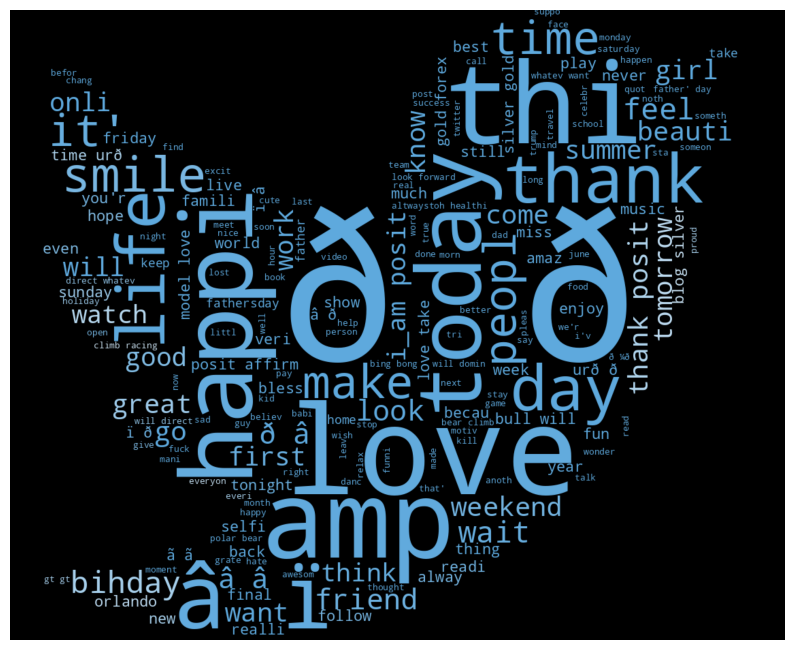

In [27]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [31]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])


In [32]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

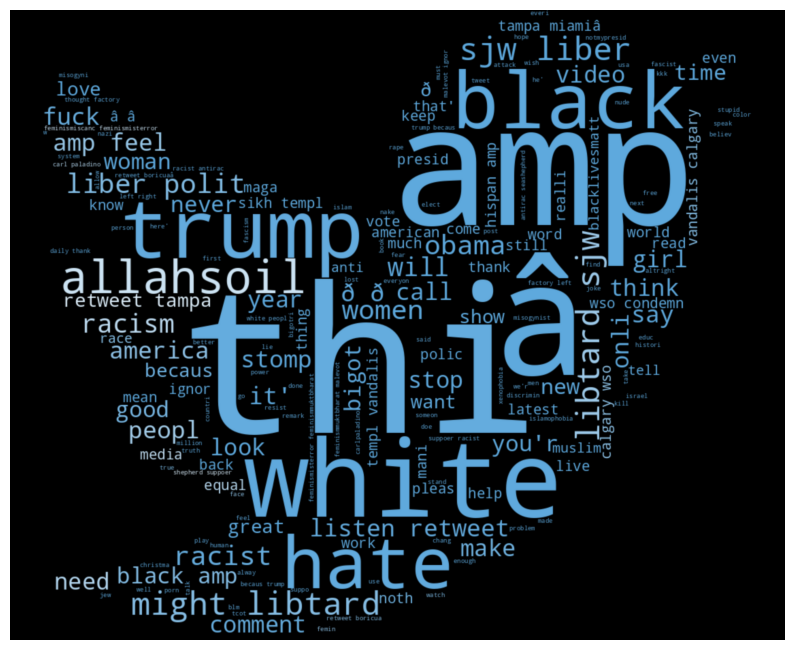

In [33]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

In [34]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [35]:

ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

ht_positive




[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['traveling

In [40]:
ht_positive_unnest = sum(ht_positive,[])


In [41]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'r

In [42]:
ht_negative_unnest = sum(ht_negative,[])


In [45]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1576, 'posit': 905, 'smile': 636, 'healthi': 558, 'thank': 526, 'fun': 434, 'affirm': 422, 'life': 399, 'model': 374, 'summer': 362, ...})

In [44]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374
5,motiv,195
6,allshowandnogo,1
7,school,27
8,exam,8
9,hate,26


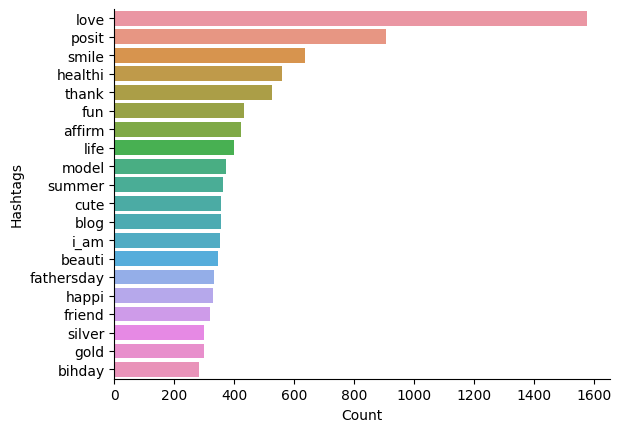

In [46]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

Counting the frequency of the words having Negative Sentiment



In [49]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'trump': 133, 'polit': 94, 'allahsoil': 92, 'liber': 79, 'libtard': 77, 'sjw': 75, 'retweet': 57, 'black': 46, 'miamiâ': 38, 'hate': 36, ...})

In [50]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,6
9,xenophobia,12


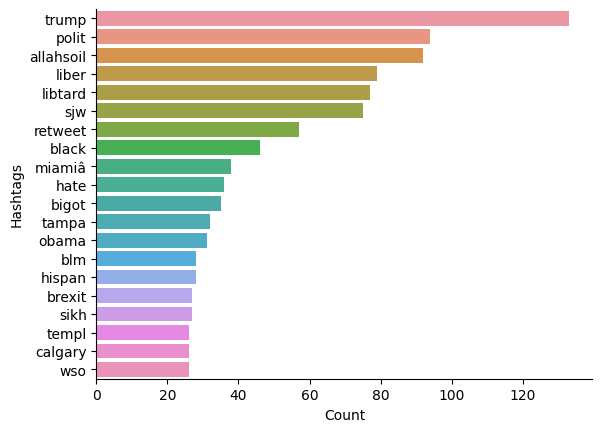

In [51]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()